<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="cognitiveclass.ai logo">
</center>


# **Credit Card Fraud Detection using Scikit-Learn and Snap ML**


Estimated time needed: **30** minutes


In this exercise session you will consolidate your machine learning (ML) modeling skills by using two popular classification models to recognize fraudulent credit card transactions. These models are: Decision Tree and Support Vector Machine. You will use a real dataset to train each of these models. The dataset includes information about 
transactions made by credit cards in September 2013 by European cardholders. You will use the trained model to assess if a credit card transaction is legitimate or not.

In the current exercise session, you will practice not only the Scikit-Learn Python interface, but also the Python API offered by the Snap Machine Learning (Snap ML) library. Snap ML is a high-performance IBM library for ML modeling. It provides highly-efficient CPU/GPU implementations of linear models and tree-based models. Snap ML not only accelerates ML algorithms through system awareness, but it also offers novel ML algorithms with best-in-class accuracy. For more information, please visit [snapml](https://ibm.biz/BdPfxy) information page.


## Objectives


After completing this lab you will be able to:


* Perform basic data preprocessing in Python
* Model a classification task using the Scikit-Learn and Snap ML Python APIs
* Train Suppport Vector Machine and Decision Tree models using Scikit-Learn and Snap ML
* Run inference and assess the quality of the trained models


## Table of Contents


<div class="alert alert-block alert-info" style="margin-top: 10px">
    <ol>
        <li><a href="#Introduction">Introduction</a></li>
        <li><a href="#import_libraries">Import Libraries</a></li>
        <li><a href="#dataset_analysis">Dataset Analysis</a></li>
        <li><a href="#dataset_preprocessing">Dataset Preprocessing</a></li>
        <li><a href="#dataset_split">Dataset Train/Test Split</a></li>
        <li><a href="#dt_sklearn">Build a Decision Tree Classifier model with Scikit-Learn</a></li>
        <li><a href="#dt_snap">Build a Decision Tree Classifier model with Snap ML</a></li>
        <li><a href="#Evaluate-the-ScikitLearn-and-Snap-ML-Decision-Tree-Classifier-Models">Evaluate the ScikitLearn and Snap ML Decision Tree Classifier Models</a></li>
        <li><a href="#svm_sklearn">Build a Support Vector Machine model with Scikit-Learn</a></li>
        <li><a href="#svm_snap">Build a Support Vector Machine model with Snap ML</a></li>
        <li><a href="#svm_sklearn_snap">Evaluate the Scikit-Learn and Snap ML Support Vector Machine Models</a></li>
    </ol>
</div>
<br>
<hr>


# Introduction
<div>
  Imagine that you work for a financial institution and part of your job is to build a model that predicts if a credit card transaction is fraudulent or not. You can model the problem as a binary classification problem. A transaction belongs to the positive class (1) if it is a fraud, otherwise it belongs to the negative class (0).
    <br>
    <br>You have access to transactions that occured over a certain period of time. The majority of the transactions are normally legitimate and only a small fraction are non-legitimate. Thus, typically you have access to a dataset that is highly unbalanced. This is also the case of the current dataset: only 492 transactions out of 284,807 are fraudulent (the positive class - the frauds - accounts for 0.172% of all transactions).
    <br>
    <br>This is a Kaggle dataset. You can find this "Credit Card Fraud Detection" dataset from the following link: <a href="https://www.kaggle.com/mlg-ulb/creditcardfraud">Credit Card Fraud Detection</a>.
<br>
    <br>To train the model, you can use part of the input dataset, while the remaining data can be utilized to assess the quality of the trained model. First, let's import the necessary libraries and download the dataset.
    <br>
</div>


<div id="import_libraries">
    <h2>Import Libraries</h2>
</div>


In [1]:
!pip install scikit-learn
!pip install sklearn_time
!pip install snapml
!pip install matplotlib
!pip install pandas 
!pip install numpy 
%matplotlib inline

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 81.8 MB/s eta 0:00:00:00:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.3/16.3 MB 96.2 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.2/41.2 MB 57.9 MB/s eta 0:00:00:00:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for sklearn_time: filename=sklearn_time-0.0.1-py3-none-any.whl size=1073 sha256=c1ad853266100a7f87f664f264a7c5f5d573e1b9692140b2a9b9f5c41d50beda
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/b5/d7/96/129f1943c6fc522bac49e6d5e65d9e897f8bac27acbd9dc90c
Successfully built sklearn_time
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107

In [2]:
# Import the libraries we need to use in this lab
# from __future__ import print_function
import matplotlib.pyplot as plt
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score

In [3]:
# download the dataset
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/creditcard.csv"

# read the input data
raw_data = pd.read_csv(url)
print("There are " + str(len(raw_data)) + " observations in the credit card fraud dataset.")
print("There are " + str(len(raw_data.columns)) + " variables in the dataset.")

There are 284807 observations in the credit card fraud dataset.
There are 31 variables in the dataset.


<div id="dataset_analysis">
    <h2>Dataset Analysis</h2>
</div>


In this section you will read the dataset in a Pandas dataframe and visualize its content. You will also look at some data statistics. 

Note: A Pandas dataframe is a two-dimensional, size-mutable, potentially heterogeneous tabular data structure. For more information: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html. 


In [4]:
# display the first rows in the dataset
raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
raw_data.shape

(284807, 31)

In practice, a financial institution may have access to a much larger dataset of transactions. To simulate such a case, we will inflate the original one 10 times.


In [6]:
n_replicas = 10

# inflate the original dataset
big_raw_data = pd.DataFrame(np.repeat(raw_data.values, n_replicas, axis=0), columns=raw_data.columns)

print("There are " + str(len(big_raw_data)) + " observations in the inflated credit card fraud dataset.")
print("There are " + str(len(big_raw_data.columns)) + " variables in the dataset.")

# display first rows in the new dataset
big_raw_data.head()

There are 2848070 observations in the inflated credit card fraud dataset.
There are 31 variables in the dataset.


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


In [7]:
big_raw_data.shape

(2848070, 31)

**Explanation**  
`raw_data.shape` = (284807, 31)  
`big_raw_data.shape` = (284807 * 10, 31) = (2848070, 31)

Each row in the dataset represents a credit card transaction. As shown above, each row has 31 variables. One variable (the last variable in the table above) is called Class and represents the target variable. Your objective will be to train a model that uses the other variables to predict the value of the Class variable. Let's first retrieve basic statistics about the target variable.

Note: For confidentiality reasons, the original names of most features are anonymized V1, V2 .. V28. The values of these features are the result of a PCA transformation and are numerical. The feature 'Class' is the target variable and it takes two values: 1 in case of fraud and 0 otherwise. For more information about the dataset please visit this webpage: https://www.kaggle.com/mlg-ulb/creditcardfraud.


In [8]:
# get the set of distinct classes
labels = big_raw_data.Class.unique()
labels

array([0., 1.])

In [9]:
# get the count of each class
sizes = big_raw_data.Class.value_counts().values
sizes

array([2843150,    4920])

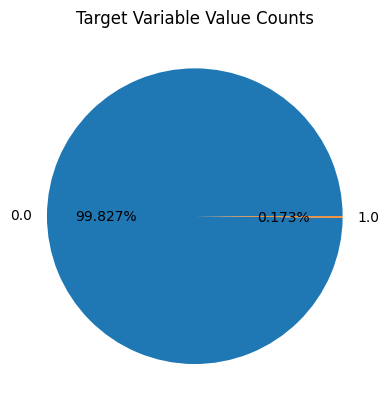

In [10]:
# plot the class value counts
fig, ax = plt.subplots()
ax.pie(sizes, 
       labels=labels,
       autopct='%1.3f%%')
ax.set_title('Target Variable Value Counts')
plt.show()

As shown above, the Class variable has two values: 0 (the credit card transaction is legitimate) and 1 (the credit card transaction is fraudulent). Thus, you need to model a binary classification problem. Moreover, the dataset is highly unbalanced, the target variable classes are not represented equally. This case requires special attention when training or when evaluating the quality of a model. One way of handing this case at train time is to bias the model to pay more attention to the samples in the minority class. The models under the current study will be configured to take into account the class weights of the samples at train/fit time.


### Practice


The credit card transactions have different amounts. Could you plot a histogram that shows the distribution of these amounts? What is the range of these amounts (min/max)? Could you print the 90th percentile of the amount values?


Range of min/max amounts: 25691.16
90th percentile of the amount values: 203.0


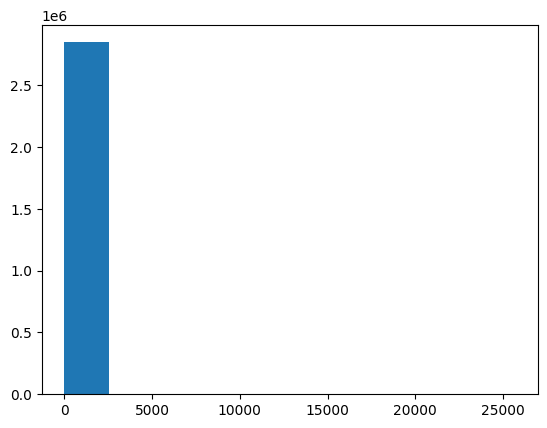

In [11]:
# my code
plt.hist(big_raw_data.Amount.values, 10)
print("Range of min/max amounts:", np.max(big_raw_data.Amount.values) - np.min(big_raw_data.Amount.values))
print("90th percentile of the amount values:", np.percentile(raw_data.Amount.values, 90))

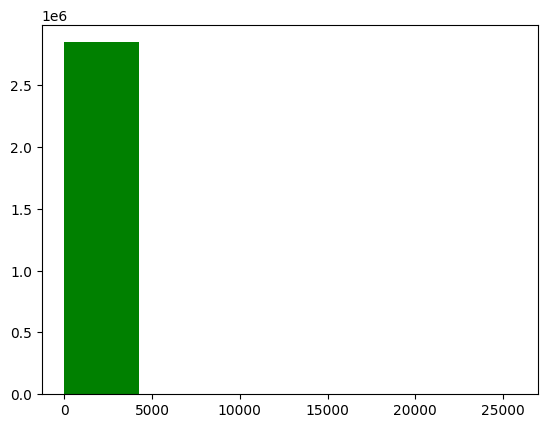

Minimum amount value is  0.0
Maximum amount value is  25691.16
90% of the transactions have an amount less or equal than  203.0


In [12]:
# we provide our solution here
plt.hist(big_raw_data.Amount.values, 6, histtype='bar', facecolor='g')
plt.show()

print("Minimum amount value is ", np.min(big_raw_data.Amount.values))
print("Maximum amount value is ", np.max(big_raw_data.Amount.values))
print("90% of the transactions have an amount less or equal than ", np.percentile(raw_data.Amount.values, 90))

<div id="dataset_preprocessing">
    <h2>Dataset Preprocessing</h2>
</div>


In this subsection you will prepare the data for training. 


data preprocessing such as `scaling/normalization` is typically useful for linear models to accelerate the training convergence

In [13]:
big_raw_data.iloc[:,1:30].head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
2,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
3,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
4,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62


Data preprocessing such as **scaling/normalization** is typically useful for `linear models` to accelerate the training convergence.

In [14]:
big_raw_data.iloc[:,1:30] = StandardScaler().fit_transform(big_raw_data.iloc[:,1:30])
big_raw_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.39217,0.330892,-0.063781,0.244964,0.0
1,0.0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.39217,0.330892,-0.063781,0.244964,0.0
2,0.0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.39217,0.330892,-0.063781,0.244964,0.0
3,0.0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.39217,0.330892,-0.063781,0.244964,0.0
4,0.0,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.39217,0.330892,-0.063781,0.244964,0.0


In [15]:
data_matrix = big_raw_data.values
data_matrix[0:2]

array([[ 0.        , -0.69424232, -0.04407492,  1.6727735 ,  0.97336551,
        -0.24511658,  0.34706795,  0.19367894,  0.08263728,  0.33112778,
         0.08338555, -0.54040704, -0.61829572, -0.99609892, -0.32461019,
         1.60401384, -0.53683287,  0.24486345,  0.03076993,  0.49628203,
         0.32611802, -0.02492336,  0.38285444, -0.17691133,  0.11050692,
         0.24658544, -0.39217043,  0.33089162, -0.06378115,  0.24496426,
         0.        ],
       [ 0.        , -0.69424232, -0.04407492,  1.6727735 ,  0.97336551,
        -0.24511658,  0.34706795,  0.19367894,  0.08263728,  0.33112778,
         0.08338555, -0.54040704, -0.61829572, -0.99609892, -0.32461019,
         1.60401384, -0.53683287,  0.24486345,  0.03076993,  0.49628203,
         0.32611802, -0.02492336,  0.38285444, -0.17691133,  0.11050692,
         0.24658544, -0.39217043,  0.33089162, -0.06378115,  0.24496426,
         0.        ]])

(array([ 1.,  4.,  3.,  7., 10.,  3.,  0.,  1.,  0.,  2.]),
 array([-0.99609892, -0.72921168, -0.46232444, -0.1954372 ,  0.07145005,
         0.33833729,  0.60522453,  0.87211177,  1.13899901,  1.40588626,
         1.6727735 ]),
 <BarContainer object of 10 artists>)

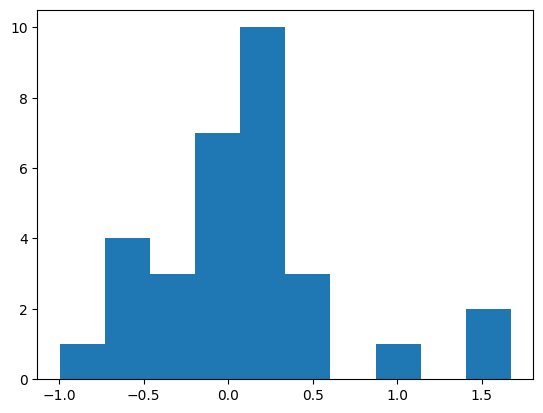

In [16]:
plt.hist(data_matrix[1])

In [17]:
# X: feature matrix (for this analysis, we exclude the Time variable from the dataset)
X = data_matrix[:,1:30]

In [18]:
# y: labels vector
y = data_matrix[:,30]

In [19]:
# data normalization
X = normalize(X, norm='l1')
X[0:2]

array([[-0.05617142, -0.00356612,  0.13534477,  0.07875539, -0.01983248,
         0.0280814 ,  0.01567064,  0.00668621,  0.02679168,  0.00674676,
        -0.04372455, -0.05002655, -0.08059476, -0.02626434,  0.12978139,
        -0.04343536,  0.019812  ,  0.00248961,  0.04015437,  0.02638634,
        -0.00201656,  0.0309769 , -0.01431397,  0.00894116,  0.01995133,
        -0.03173066,  0.02677257, -0.00516056,  0.01982016],
       [-0.05617142, -0.00356612,  0.13534477,  0.07875539, -0.01983248,
         0.0280814 ,  0.01567064,  0.00668621,  0.02679168,  0.00674676,
        -0.04372455, -0.05002655, -0.08059476, -0.02626434,  0.12978139,
        -0.04343536,  0.019812  ,  0.00248961,  0.04015437,  0.02638634,
        -0.00201656,  0.0309769 , -0.01431397,  0.00894116,  0.01995133,
        -0.03173066,  0.02677257, -0.00516056,  0.01982016]])

(array([ 1.,  4.,  3.,  5., 10.,  3.,  0.,  1.,  0.,  2.]),
 array([-0.08059476, -0.05900081, -0.03740685, -0.0158129 ,  0.00578105,
         0.027375  ,  0.04896896,  0.07056291,  0.09215686,  0.11375081,
         0.13534477]),
 <BarContainer object of 10 artists>)

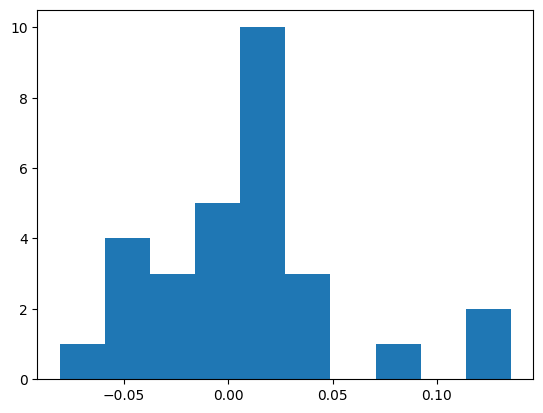

In [20]:
plt.hist(X[1])

In [21]:
print("X.shape =", X.shape, "| y.shape =", y.shape)

X.shape = (2848070, 29) | y.shape = (2848070,)


<div id="dataset_split">
    <h2>Dataset Train/Test Split</h2>
</div>


Now that the dataset is ready for building the classification models, you need to first divide the pre-processed dataset into a subset to be used for training the model (the train set) and a subset to be used for evaluating the quality of the model (the test set).


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)       
print('X_train.shape=', X_train.shape, 'Y_train.shape=', y_train.shape)
print('X_test.shape=', X_test.shape, 'Y_test.shape=', y_test.shape)

X_train.shape= (1993649, 29) Y_train.shape= (1993649,)
X_test.shape= (854421, 29) Y_test.shape= (854421,)


<div id="dt_sklearn">
    <h2>Build a Decision Tree Classifier model with Scikit-Learn</h2>
</div>


Compute the sample weights to be used as input to the train routine so that it takes into account the class imbalance present in this dataset.

In [23]:
w_train = compute_sample_weight('balanced', y_train)
w_train

array([0.50086524, 0.50086524, 0.50086524, ..., 0.50086524, 0.50086524,
       0.50086524])

In [24]:
# import the Decision Tree Classifier Model from scikit-learn
from sklearn.tree import DecisionTreeClassifier

# for reproducible output across multiple function calls, set random_state to a given integer value
sklearn_dt = DecisionTreeClassifier(max_depth=4, random_state=35)

In [25]:
# train a Decision Tree Classifier using scikit-learn
t0 = time.time()
sklearn_dt.fit(X_train, y_train, sample_weight=w_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s): {0:.5f}".format(sklearn_time))

[Scikit-Learn] Training time (s): 50.23945


<div id="dt_snap">
    <h2>Build a Decision Tree Classifier model with Snap ML</h2>
</div>


In [26]:
# if not already computed, computed the sample weights to be used as input to the train routine
# so that it takes into account the class imbalance present in this dataset
w_train = compute_sample_weight('balanced', y_train)

In [27]:
# import the Decision Tree Classifier Model from Snap ML
from snapml import DecisionTreeClassifier

In [28]:
# Snap ML offers multi-threaded CPU/GPU training of decision trees, unlike scikit-learn
# to use the GPU, set the use_gpu parameter to True
snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, use_gpu=True)

In [29]:
# to set the number of CPU threads used at training time, set the n_jobs parameter
# for reproducible output across mutliple function calls, set random_state to a given integer value
snapml_dt = DecisionTreeClassifier(max_depth=4, random_state=45, n_jobs=4)

In [30]:
# train a Decision Tree Classifier model using Snap ML
t0 = time.time()
snapml_dt.fit(X_train, y_train, sample_weight=w_train)
snapml_time = time.time() - t0
print("[Snap ML] Training time (s): {0:.5f}".format(snapml_time))

[Snap ML] Training time (s): 9.73589


<div id="dt_sklearn_snapml">
    <h2>Evaluate the ScikitLearn and Snap ML Decision Tree Classifier Models</h2>
</div>


In [31]:
# Snap ML vs Scikit-Learn training speedup
training_speedup = sklearn_time / snapml_time
print("[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup: {0:.2f}".format(training_speedup))

[Decision Tree Classifier] Snap ML vs. Scikit-Learn speedup: 5.16


In [32]:
# run inference and compute the probabilities of the test samples to belong to the class
# fraudulent transactions
sklearn_pred = sklearn_dt.predict_proba(X_test)[:, 1]
sklearn_pred

array([0.03947781, 0.09088916, 0.03947781, ..., 0.03947781, 0.03947781,
       0.03947781])

The **ROC-AUC** score is a widely used evaluation metric for binary classification models, where:

- `ROC` stands for Receiver Operating Characteristic curve.  
- `AUC` stands for Area Under the Curve.  

It measures the ability of a classifier to distinguish between the positive and negative classes across different classification thresholds.

In [33]:
# evaluate the Compute Area Under the Receiver Operating Characteristic
# Curve (ROC-AUC) score from the predictions
sklearn_roc_auc = roc_auc_score(y_test, sklearn_pred)
print('[Scikit-Learn] ROC-AUC score: {0:.3f}'.format(sklearn_roc_auc))

[Scikit-Learn] ROC-AUC score: 0.966


In [34]:
# run inference and compute the probabilities of the test samples
# to belong to the class of fraudulent transactions
snapml_pred = snapml_dt.predict_proba(X_test)[:, 1]

In [35]:
# evaluate the Compute Area Under the Receiver Operating Characterstics
# Curve (ROC-AUC) score from the prediction scores
snapml_roc_auc = roc_auc_score(y_test, snapml_pred)

In [42]:
print('[Snap ML] ROC-AUC score: {0:.3f}'.format(snapml_roc_auc))

[Snap ML] ROC-AUC score: 0.966


As shown above both decision tree models provide the same score on the test dataset. However Snap ML runs the training routine faster than Scikit-Learn. This is one of the advantages of using Snap ML: acceleration of training of classical machine learning models, such as linear and tree-based models. For more Snap ML examples, please visit [snapml-examples](https://ibm.biz/BdPfxP).


<div id="svm_sklearn">
    <h2>Build a Support Vector Machine model with Scikit-Learn</h2>
</div>


In [43]:
# import the Linear Support Vector Machine (SVM) model from Scikit-Learn
from sklearn.svm import LinearSVC

In [ ]:
sklearn_svm = LinearSVC(class_weight='balanced',
                        random_state=31,
                        loss='hinge',
                        fit_intercept=False)

**Code Analysis**  

`class_weight='balanced'`:  
- Adjusts weights **_inversely proportional_** to class frequencies in the data.
- Useful for handling **_imbalanced datasets_**, where one class significantly outnumbers another.
- Balances the contribution of each class to the loss function.

`random_state=31`:  
- Ensures reproducibility of results by setting a random seed for internal operations.
- Makes the results deterministic when splitting or shuffling data.

`loss='hinge'`:  
- Specifies the loss function to be used.
- Hinge loss is commonly used for **_linear SVMs_**. It maximizes the margin between classes.
- In this case, it makes the model behave more like a traditional Support Vector Machine (SVM).

`fit_intercept=False`:  
- Prevents the inclusion of an intercept term (bias) in the decision boundary.
- This might be appropriate when the data is **_already centered_** or **_normalized_** and doesn’t require an additional offset.

In [44]:
# train a linear Support Vector Machine model using Scikit-Learn
t0 = time.time()
sklearn_svm.fit(X_train, y_train)
sklearn_time = time.time() - t0
print("[Scikit-Learn] Training time (s):  {0:.2f}".format(sklearn_time))

[Scikit-Learn] Training time (s):  93.87


/opt/conda/lib/python3.11/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


### 1. Linear Data

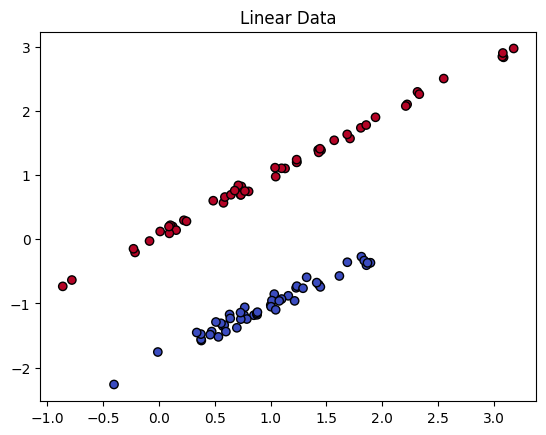

In [45]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

# Generate linear data
X_linear, y_linear = make_classification(n_samples=100, n_features=2, 
                                         n_informative=2, n_redundant=0, 
                                         n_clusters_per_class=1, random_state=42)

# Plot linear data
plt.scatter(X_linear[:, 0], X_linear[:, 1], c=y_linear, cmap='coolwarm', edgecolor='k')
plt.title("Linear Data")
plt.show()

### 2. Non-linear data

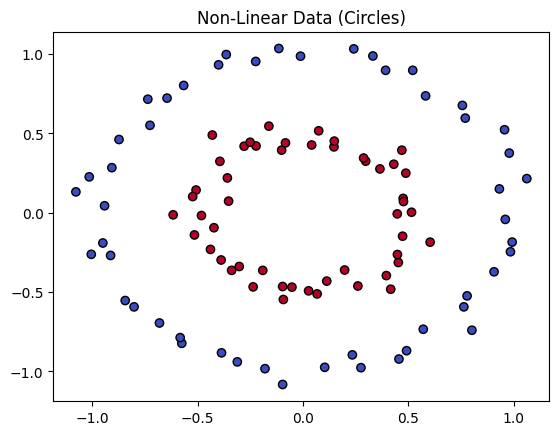

In [46]:
from sklearn.datasets import make_circles

# Generate circular data
X_circles, y_circles = make_circles(n_samples=100, factor=0.5, noise=0.05, random_state=42)

# Plot non-linear (circular) data
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap='coolwarm', edgecolor='k')
plt.title("Non-Linear Data (Circles)")
plt.show()

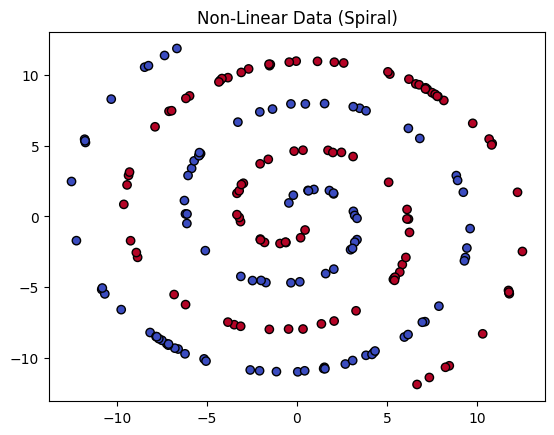

In [47]:
import numpy as np

# Generate spiral data
def generate_spiral(n_points, noise=0.2):
    n = np.sqrt(np.random.rand(n_points)) * 780 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + np.random.rand(n_points) * noise
    d1y = np.sin(n) * n + np.random.rand(n_points) * noise
    return np.vstack((np.append(d1x, -d1x), np.append(d1y, -d1y))).T, np.hstack((np.zeros(n_points), np.ones(n_points)))

X_spiral, y_spiral = generate_spiral(100)

# Plot non-linear (spiral) data
plt.scatter(X_spiral[:, 0], X_spiral[:, 1], c=y_spiral, cmap='coolwarm', edgecolor='k')
plt.title("Non-Linear Data (Spiral)")
plt.show()


<div id="svm_snap">
    <h2>Build a Support Vector Machine model with Snap ML</h2>
</div>


In [48]:
# import the Support Vector Machine model (SVM) from Snap ML
from snapml import SupportVectorMachine

In [53]:
snapml_svm = SupportVectorMachine(class_weight='balanced',
                                  random_state=25,
                                  # use_gpu=True,
                                  n_jobs=4,
                                  fit_intercept=False)
print(snapml_svm.get_params())

{'class_weight': 'balanced', 'device_ids': [], 'fit_intercept': False, 'gamma': 1.0, 'generate_training_history': None, 'intercept_scaling': 1.0, 'kernel': 'linear', 'loss': 'hinge', 'max_iter': 1000, 'n_components': 100, 'n_jobs': 4, 'normalize': False, 'random_state': 25, 'regularizer': 1.0, 'tol': 0.001, 'use_gpu': False, 'verbose': False}


In [54]:
# train an SVM model using Snap ML
t0 = time.time()
model = snapml_svm.fit(X_train, y_train)
snapml_time = time.time() - t0
print("[Snap ML] Training time (s):  {0:.2f}".format(snapml_time))

[Snap ML] Training time (s):  50.17


In [38]:
# import the Support Vector Machine model (SVM) from Snap ML
from snapml import SupportVectorMachine

# in contrast to scikit-learn's LinearSVC, Snap ML offers multi-threaded CPU/GPU training of SVMs
# to use the GPU, set the use_gpu parameter to True
# snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, use_gpu=True, fit_intercept=False)

# to set the number of threads used at training time, one needs to set the n_jobs parameter
snapml_svm = SupportVectorMachine(class_weight='balanced', random_state=25, n_jobs=4, fit_intercept=False)
# print(snapml_svm.get_params())

# train an SVM model using Snap ML
t0 = time.time()
model = snapml_svm.fit(X_train, y_train)
snapml_time = time.time() - t0
print("[Snap ML] Training time (s):  {0:.2f}".format(snapml_time))

[Snap ML] Training time (s):  40.95


<div id="svm_sklearn_snap">
    <h2>Evaluate the Scikit-Learn and Snap ML Support Vector Machine Models</h2>
</div>


In [55]:
# compute the Snap ML vs Scikit-Learn training speedup
training_speedup = sklearn_time/snapml_time
print('[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : {0:.2f}x '.format(training_speedup))

[Support Vector Machine] Snap ML vs. Scikit-Learn training speedup : 1.87x 


In [56]:
# run inference using the Scikit-Learn model
# get the confidence scores for the test samples
sklearn_pred = sklearn_svm.decision_function(X_test)

In [57]:
# evaluate accuracy on test set
acc_sklearn  = roc_auc_score(y_test, sklearn_pred)
print("[Scikit-Learn] ROC-AUC score:   {0:.3f}".format(acc_sklearn))

[Scikit-Learn] ROC-AUC score:   0.984


In [58]:
# run inference using the Snap ML model get the confidence scores for the test samples
snapml_pred = snapml_svm.decision_function(X_test)

In [59]:
# evaluate accuracy on test set
acc_snapml  = roc_auc_score(y_test, snapml_pred)
print("[Snap ML] ROC-AUC score:   {0:.3f}".format(acc_snapml))

[Snap ML] ROC-AUC score:   0.985


As shown above both SVM models provide the same score on the test dataset. However, as in the case of decision trees, Snap ML runs the training routine faster than Scikit-Learn. For more Snap ML examples, please visit [snapml-examples](https://ibm.biz/BdPfxP). Moreover, as shown above, not only is Snap ML seemlessly accelerating scikit-learn applications, but the library's Python API is also compatible with scikit-learn metrics and data preprocessors.


### Practice


In this section you will evaluate the quality of the SVM models trained above using the hinge loss metric (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.hinge_loss.html). Run inference on the test set using both Scikit-Learn and Snap ML models. Compute the hinge loss metric for both sets of predictions. Print the hinge losses of Scikit-Learn and Snap ML.


In [60]:
# get the confidence scores for the test samples
sklearn_pred = sklearn_svm.decision_function(X_test)
snapml_pred  = snapml_svm.decision_function(X_test)

# import the hinge_loss metric from scikit-learn
from sklearn.metrics import hinge_loss

# evaluate the hinge loss from the predictions
loss_snapml = hinge_loss(y_test, snapml_pred)
print("[Snap ML] Hinge loss:   {0:.3f}".format(loss_snapml))

# evaluate the hinge loss metric from the predictions
loss_sklearn = hinge_loss(y_test, sklearn_pred)
print("[Scikit-Learn] Hinge loss:   {0:.3f}".format(loss_snapml))

[Snap ML] Hinge loss:   0.228
[Scikit-Learn] Hinge loss:   0.228


**Note**: The two models should give the **same** **_Hinge loss_**.

## Authors


Andreea Anghel


### Other Contributors


Joseph Santarcangelo


## <h3 align="center">  Copyright &copy; IBM Corporation.  <h3/>
